In [ ]:
# Consider a dataset where the range of values is very different for each feature.
# This can lead to unexpected  in distance-based machine learning algorithms - i.e., where
# the distance between features is used to determine similarity or influence.

import numpy as np

X = np.array([
    # HP,  Price ($)
    [160,  20000],
    [165,  22000],
    [170, 100000],
    [175, 120000],
    [180, 180000],
])

# Query point
x_new = np.array([[168, 125000]])

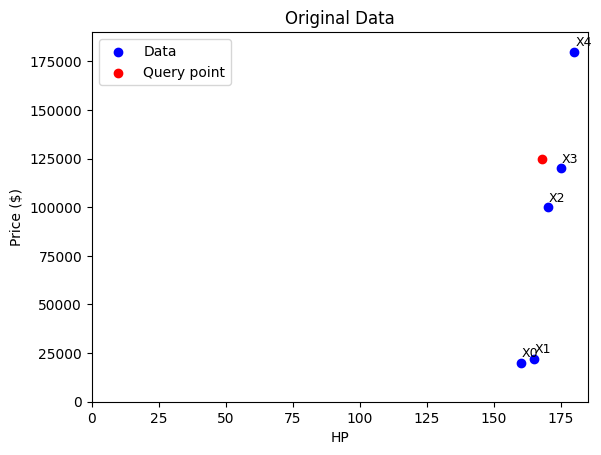

Distances before scaling:
x_new → X[0]: 105000.00
x_new → X[1]: 103000.00
x_new → X[2]: 25000.00
x_new → X[3]: 5000.00
x_new → X[4]: 55000.00

Nearest neighbor BEFORE scaling: X[3]


In [8]:
# -------------------------------
# Plot original data
# -------------------------------
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c = 'blue', label = 'Data')
for i, (x, y) in enumerate(X):
    plt.text(x+0.3, y+3000, f"X{i}", fontsize = 9)
plt.scatter(x_new[:, 0], x_new[:, 1], c = 'red', marker = 'o', label = 'Query point')
plt.xlabel("HP")
plt.ylabel("Price ($)")
plt.title("Original Data")
# force axes to start at (0, 0)
plt.xlim(0, max(np.max(X[:, 0]), x_new[0, 0]) + 5)
plt.ylim(0, max(np.max(X[:, 1]), x_new[0, 1]) + 10000)
plt.legend()
plt.show()

# -------------------------------
# Distances before scaling
# -------------------------------
d1 = np.sqrt((X[0, 0] - x_new[0, 0])**2 + (X[0, 1] - x_new[0, 1])**2)
d2 = np.sqrt((X[1, 0] - x_new[0, 0])**2 + (X[1, 1] - x_new[0, 1])**2)
d3 = np.sqrt((X[2, 0] - x_new[0, 0])**2 + (X[2, 1] - x_new[0, 1])**2)
d4 = np.sqrt((X[3, 0] - x_new[0, 0])**2 + (X[3, 1] - x_new[0, 1])**2)
d5 = np.sqrt((X[4, 0] - x_new[0, 0])**2 + (X[4, 1] - x_new[0, 1])**2)

distances_before = [d1, d2, d3, d4, d5]

print("Distances before scaling:")
for i, d in enumerate(distances_before):
    print(f"x_new → X[{i}]: {d:.2f}")

# -------------------------------
# Show nearest neighbors before scaling
# -------------------------------
nn_before = np.argmin(distances_before)
print(f"\nNearest neighbor BEFORE scaling: X[{nn_before}]")

In [9]:
# -------------------------------
# Apply StandardScaler
# -------------------------------
from sklearn.preprocessing import StandardScaler

scaler       = StandardScaler()
X_scaled     = scaler.fit_transform(X)
x_new_scaled = scaler.transform(x_new)

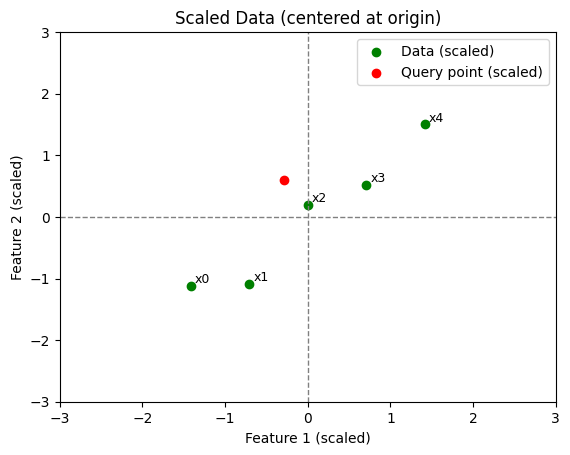


Distances after scaling:
x_new_scaled → X_scaled[0]: 2.06
x_new_scaled → X_scaled[1]: 1.74
x_new_scaled → X_scaled[2]: 0.50
x_new_scaled → X_scaled[3]: 0.99
x_new_scaled → X_scaled[4]: 1.92

Nearest neighbor AFTER scaling : X[2]


In [10]:
# -------------------------------
# Plot scaled data
# -------------------------------
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = 'green', label = 'Data (scaled)')
plt.scatter(x_new_scaled[:, 0], x_new_scaled[:, 1], c = 'red', marker = 'o', label = 'Query point (scaled)')
for i, (x, y) in enumerate(X_scaled):
    plt.text(x+0.05, y+0.05, f"x{i}", fontsize=9)
plt.axhline(0, color = 'gray', linestyle = '--', linewidth = 1)
plt.axvline(0, color = 'gray', linestyle = '--', linewidth = 1)
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("Scaled Data (centered at origin)")
plt.legend()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

# -------------------------------
# Distances after scaling
# -------------------------------
d1s = np.sqrt((X_scaled[0, 0] - x_new_scaled[0, 0])**2 + (X_scaled[0, 1] - x_new_scaled[0, 1])**2)
d2s = np.sqrt((X_scaled[1, 0] - x_new_scaled[0, 0])**2 + (X_scaled[1, 1] - x_new_scaled[0, 1])**2)
d3s = np.sqrt((X_scaled[2, 0] - x_new_scaled[0, 0])**2 + (X_scaled[2, 1] - x_new_scaled[0, 1])**2)
d4s = np.sqrt((X_scaled[3, 0] - x_new_scaled[0, 0])**2 + (X_scaled[3, 1] - x_new_scaled[0, 1])**2)
d5s = np.sqrt((X_scaled[4, 0] - x_new_scaled[0, 0])**2 + (X_scaled[4, 1] - x_new_scaled[0, 1])**2)

distances_after = [d1s, d2s, d3s, d4s, d5s]

print("\nDistances after scaling:")
for i, d in enumerate(distances_after):
    print(f"x_new_scaled → X_scaled[{i}]: {d:.2f}")

# -------------------------------
# Show nearest neighbor after scaling
# -------------------------------
nn_after  = np.argmin(distances_after)
print(f"\nNearest neighbor AFTER scaling : X[{nn_after}]")